In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
!pip install sidetable

In [172]:
file_path = "/content/drive/MyDrive/hotel_booking_Model_data.csv"
df = pd.read_csv(file_path)


## Checking the Data

In [173]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,stays,guests,kids,lead_time_month,booking_country,is_previously_cancelled,is_booking_changes,parking_space
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Portugal,0,1,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Portugal,0,1,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Non_Portugal,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Non_Portugal,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,Non_Portugal,0,0,0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_year               118985 non-null  int64  
 4   arrival_date_month              118985 non-null  object 
 5   arrival_date_week_number        118985 non-null  int64  
 6   arrival_date_day_of_month       118985 non-null  int64  
 7   adults                          118985 non-null  int64  
 8   meal                            118985 non-null  object 
 9   country                         118985 non-null  object 
 10  market_segment                  118985 non-null  object 
 11  distribution_channel            118985 non-null  object 
 12  is_repeated_gues

### preprocessing hotel & booking_country  labels because there are only 2 unique values.

In [175]:

df['hotel_label'] = df['hotel'].map({'Resort Hotel':0, 'City Hotel': 1})

df['booking_country_label'] =df['booking_country'].map({'Portugal':0, 'Non_Portugal':1})

In [176]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,stays,guests,kids,lead_time_month,booking_country,is_previously_cancelled,is_booking_changes,parking_space,hotel_label,booking_country_label
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Portugal,0,1,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Portugal,0,1,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Non_Portugal,0,0,0,0,1
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Non_Portugal,0,0,0,0,1
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,Non_Portugal,0,0,0,0,1


## Model Building

In [177]:
df = df.drop(columns=[
    'hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month',
    'adults', 'meal', 'country', 'distribution_channel', 'previous_cancellations', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
    'reservation_status', 'reservation_status_date', 'value_is_NaN', 'arrival_date', 'arrival_month', 'arrival_day',
    'month_year', 'kids', 'lead_time_month', 'booking_country'
], errors='ignore')

df.head()


,is_canceled,lead_time,market_segment,is_repeated_guest,deposit_type,customer_type,total_of_special_requests,stays,guests,is_previously_cancelled,is_booking_changes,parking_space,hotel_label,booking_country_label
0,0,342,Direct,0,No Deposit,Transient,0,0,2.0,0,1,0,0,0
1,0,737,Direct,0,No Deposit,Transient,0,0,2.0,0,1,0,0,0
2,0,7,Direct,0,No Deposit,Transient,0,1,1.0,0,0,0,0,1
3,0,13,Corporate,0,No Deposit,Transient,0,1,1.0,0,0,0,0,1
4,0,14,Online TA,0,No Deposit,Transient,1,2,2.0,0,0,0,0,1


In [178]:
X = df.drop("is_canceled",axis = 1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.head()

,lead_time,market_segment,is_repeated_guest,deposit_type,customer_type,total_of_special_requests,stays,guests,is_previously_cancelled,is_booking_changes,parking_space,hotel_label,booking_country_label
111811,30,Direct,0,No Deposit,Transient,1,1,3.0,0,1,0,1,0
18678,15,Corporate,0,No Deposit,Transient-Party,0,2,2.0,1,0,0,0,0
25566,160,Offline TA/TO,0,No Deposit,Transient,0,7,2.0,0,0,0,0,1
52665,88,Online TA,0,No Deposit,Transient,0,3,2.0,0,0,0,1,1
88106,56,Complementary,0,No Deposit,Transient,0,1,2.0,0,0,0,1,0


In [179]:
categorical_columns = ['market_segment','deposit_type','customer_type']
numerical_columns = ['lead_time','is_repeated_guest','total_of_special_requests', 'stays', 'guests', 'is_previously_cancelled',
               'is_booking_changes','parking_space','hotel_label','booking_country_label']

In [180]:
categorical_pipeline = Pipeline([('encoder', OneHotEncoder())])

numerical_pipeline = Pipeline([('scaler', RobustScaler())])

prepocessor = ColumnTransformer([('categorical',categorical_pipeline,categorical_columns),
                                 ('numerical', numerical_pipeline,numerical_columns)])

pipe_logreg = Pipeline([("prep", prepocessor),("algo", LogisticRegression())])

pipe_KNN = Pipeline([('prep', prepocessor),('algo', KNeighborsClassifier())])

pipe_RF = Pipeline([("prep", prepocessor),("algo", RandomForestClassifier())])

pipe_DT = Pipeline([("prep", prepocessor),("algo", DecisionTreeClassifier())])

pipe_XGB = Pipeline([("prep", prepocessor),("algo", XGBClassifier())])

## Logistic Regression

In [181]:
pipe_logreg.fit(X_train, y_train)
y_train_pred_LR = pipe_logreg.predict(X_train)
y_test_pred_LR = pipe_logreg.predict(X_test)

In [182]:
LR_model_train = accuracy_score(y_train_pred_LR, y_train)
LR_model_test = accuracy_score(y_test_pred_LR, y_test)

print("Training Accuracy: ",LR_model_train)
print(f"Testing Accuracy: ",LR_model_test)

Training Accuracy:  0.8025801571626676
Testing Accuracy:  0.8041769971004749


In [183]:
print('The classification report for Logistic Regression training set is\n',classification_report(y_train, y_train_pred_LR ))

The classification report for Logistic Regression training set is
               precision    recall  f1-score   support

           0       0.80      0.91      0.85     59897
           1       0.80      0.62      0.70     35291

    accuracy                           0.80     95188
   macro avg       0.80      0.76      0.78     95188
weighted avg       0.80      0.80      0.80     95188



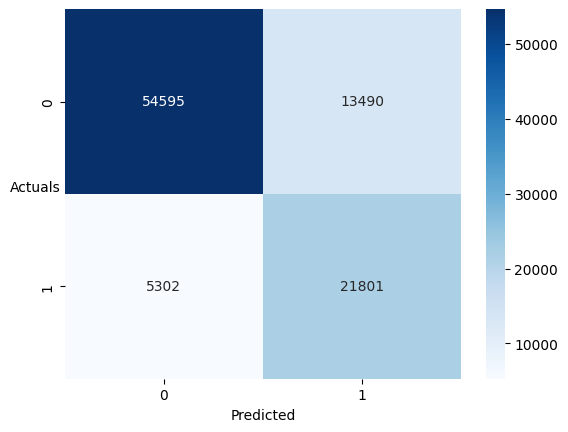

In [184]:
sns.heatmap((confusion_matrix(y_train_pred_LR,y_train)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [185]:
print('The classification report for Logistic Regression testing set is\n',classification_report(y_test, y_test_pred_LR))

The classification report for Logistic Regression testing set is
               precision    recall  f1-score   support

           0       0.80      0.92      0.85     14974
           1       0.81      0.62      0.70      8823

    accuracy                           0.80     23797
   macro avg       0.81      0.77      0.78     23797
weighted avg       0.81      0.80      0.80     23797



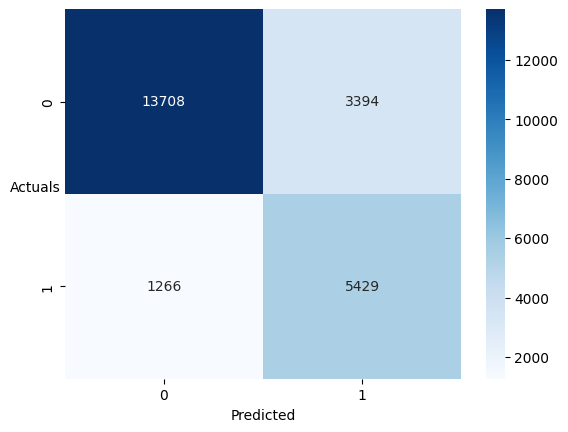

In [186]:
sns.heatmap((confusion_matrix(y_test_pred_LR,y_test)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

## Decision Tree

In [187]:
pipe_DT.fit(X_train, y_train)
y_train_pred_DT = pipe_DT.predict(X_train)
y_test_pred_DT = pipe_DT.predict(X_test)

In [188]:
DT_model_train = accuracy_score(y_train, y_train_pred_DT)
DT_model_test = accuracy_score(y_test, y_test_pred_DT)

print("Training Accuracy: ",DT_model_train)
print(f"Testing Accuracy: ",DT_model_test)

Training Accuracy:  0.9419779804176998
Testing Accuracy:  0.8329621380846325


In [189]:
print('The classification report for Decission Tree training set is\n',classification_report(y_train, y_train_pred_DT))

The classification report for Decission Tree training set is
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     59897
           1       0.95      0.89      0.92     35291

    accuracy                           0.94     95188
   macro avg       0.94      0.93      0.94     95188
weighted avg       0.94      0.94      0.94     95188



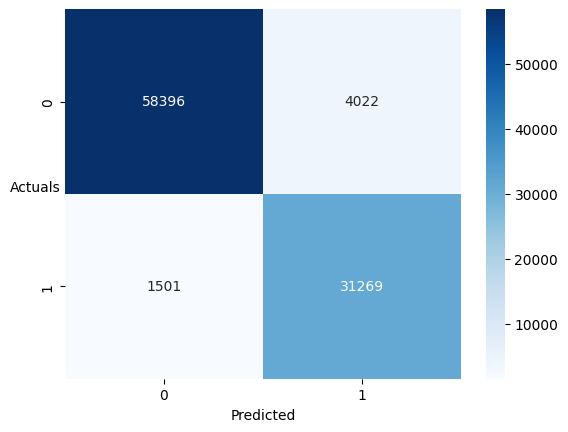

In [190]:
sns.heatmap((confusion_matrix(y_train_pred_DT,y_train)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [191]:
print('The classification report for Decission Tree testing set is\n',classification_report(y_test, y_test_pred_DT ))

The classification report for Decission Tree testing set is
               precision    recall  f1-score   support

           0       0.86      0.88      0.87     14974
           1       0.79      0.75      0.77      8823

    accuracy                           0.83     23797
   macro avg       0.82      0.82      0.82     23797
weighted avg       0.83      0.83      0.83     23797



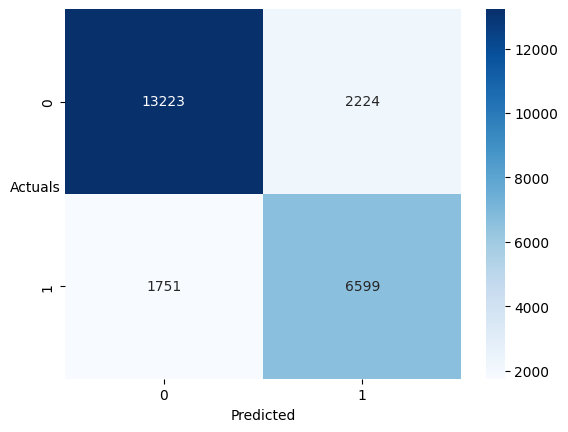

In [192]:
sns.heatmap((confusion_matrix(y_test_pred_DT,y_test)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

## Random Forest

In [193]:
pipe_RF.fit(X_train, y_train)
y_train_pred_RF = pipe_RF.predict(X_train)
y_test_pred_RF = pipe_RF.predict(X_test)

In [194]:
RF_model_train = accuracy_score(y_train, y_train_pred_RF)
RF_model_test = accuracy_score(y_test, y_test_pred_RF)

print("Training Accuracy: ",RF_model_train)
print(f"Testing Accuracy: ",RF_model_test)

Training Accuracy:  0.9419674748917931
Testing Accuracy:  0.840862293566416


In [195]:
print('The classification report for Random Forest training set is\n',classification_report(y_train, y_train_pred_RF))

The classification report for Random Forest training set is
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     59897
           1       0.94      0.91      0.92     35291

    accuracy                           0.94     95188
   macro avg       0.94      0.93      0.94     95188
weighted avg       0.94      0.94      0.94     95188



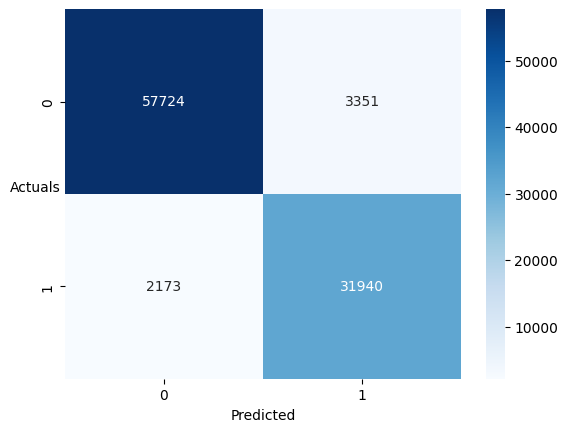

In [196]:
sns.heatmap((confusion_matrix(y_train_pred_RF,y_train)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [197]:
print('The classification report for Random Forest testing set is\n',classification_report(y_test, y_test_pred_RF))

The classification report for Random Forest testing set is
               precision    recall  f1-score   support

           0       0.86      0.89      0.88     14974
           1       0.80      0.76      0.78      8823

    accuracy                           0.84     23797
   macro avg       0.83      0.82      0.83     23797
weighted avg       0.84      0.84      0.84     23797



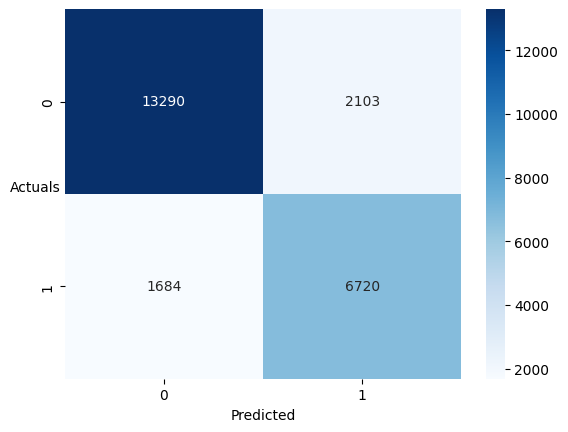

In [198]:
sns.heatmap((confusion_matrix(y_test_pred_RF,y_test)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

## XGBoost

In [199]:
pipe_XGB.fit(X_train, y_train)
y_train_pred_XGB = pipe_XGB.predict(X_train)
y_test_pred_XGB = pipe_XGB.predict(X_test)

In [200]:
XGB_model_train = accuracy_score(y_train, y_train_pred_XGB)
XGB_model_test = accuracy_score(y_test, y_test_pred_XGB)

print("Training Accuracy: ",XGB_model_train)
print(f"Testing Accuracy: ",XGB_model_test)

Training Accuracy:  0.8598878009833172
Testing Accuracy:  0.8490566037735849


In [201]:
print('The classification report for XG Boost training set is\n',classification_report(y_train, y_train_pred_XGB))

The classification report for XG Boost training set is
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     59897
           1       0.84      0.76      0.80     35291

    accuracy                           0.86     95188
   macro avg       0.86      0.84      0.85     95188
weighted avg       0.86      0.86      0.86     95188



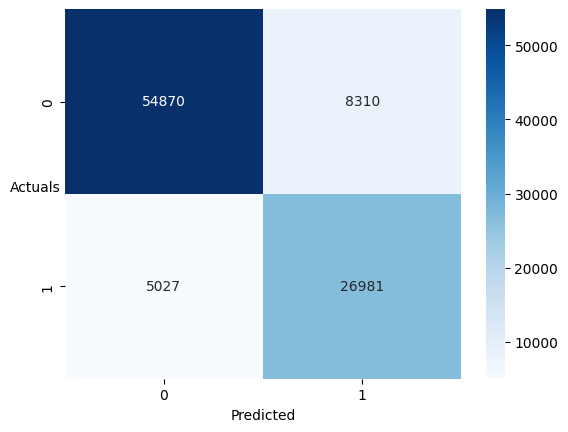

In [202]:
sns.heatmap((confusion_matrix(y_train_pred_XGB,y_train)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [203]:
print('The classification report for XG Boost testing set is\n',classification_report(y_test, y_test_pred_XGB))

The classification report for XG Boost testing set is
               precision    recall  f1-score   support

           0       0.86      0.91      0.88     14974
           1       0.83      0.75      0.79      8823

    accuracy                           0.85     23797
   macro avg       0.84      0.83      0.83     23797
weighted avg       0.85      0.85      0.85     23797



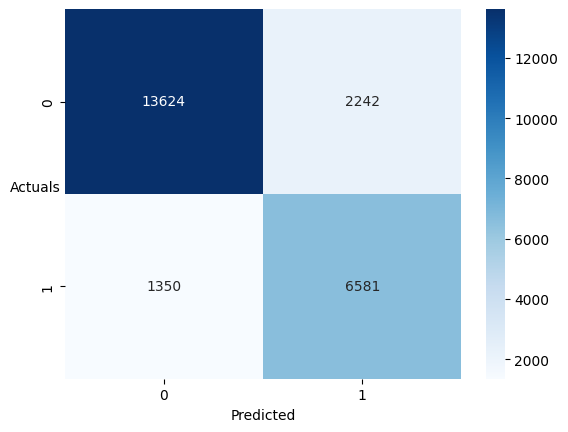

In [204]:
sns.heatmap((confusion_matrix(y_test_pred_XGB, y_test)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

### Comparing each model Training and Testing Score

In [205]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [206]:
evaluation_matrix_base_training = {"Training" : [LR_model_train, DT_model_train, RF_model_train, XGB_model_train],
                                   "Testing" : [LR_model_test, DT_model_test, RF_model_test, XGB_model_test]}

eva_base_training = pd.DataFrame(data = evaluation_matrix_base_training, index = ['Logistic Regression' ,'Decision Tree', 'Random Forest', 'XGB'])

eva_base_training

display_side_by_side([eva_base_training], ['Accuracy Train & Test'])



,Training,Testing
Logistic Regression,0.802580,0.804177
Decision Tree,0.941978,0.832962
Random Forest,0.941967,0.840862
XGB,0.859888,0.849057


# Hyperparameter Tuning


## Logistic Regression

In [207]:
param_logreg = {
    'algo__penalty':['l2', 'l1', 'elasticnet'],
    'algo__C':[1.0, 2.0, 3.0, 0.5, 0.1],
    'algo__class_weight':[None, 'balanced']
}

model_logreg = GridSearchCV(estimator=pipe_logreg, param_grid=param_logreg, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_logreg.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['market_segment',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['lead_time',
                                                                          'is_repeated_guest',
                                                                          'total_of_special_requests',
                                                                          'stays',
                                                                          'guests',
                                                                          'is_previously_cancelled',
                                                                          'is_booking_changes',
                                                                          'parking_space',
                                                                          'hotel_label',
                                                                          'booking_country_label'])])),
                                       ('algo', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'algo__C': [1.0, 2.0, 3.0, 0.5, 0.1],
                         'algo__class_weight': [None, 'balanced'],
                         'algo__penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [208]:
logreg_tuned = model_logreg.best_estimator_
logreg_tuned_train = model_logreg.best_score_
logreg_tuned_test = logreg_tuned.predict(X_test)

In [214]:
logreg_model_tuned_train = logreg_tuned_train
logreg_model_tuned_test = accuracy_score(y_test, logreg_tuned_test)

print("Training Accuracy: ",logreg_model_tuned_train)
print(f"Testing Accuracy: ",logreg_model_tuned_test)

Training Accuracy:  0.8025486504742066
Testing Accuracy:  0.8041349749968484


In [210]:
print('The classification report for Logestic Regression testing data set is\n',classification_report(y_test, logreg_tuned_test))

The classification report for Logestic Regression testing data set is
               precision    recall  f1-score   support

           0       0.80      0.92      0.85     14974
           1       0.81      0.62      0.70      8823

    accuracy                           0.80     23797
   macro avg       0.81      0.77      0.78     23797
weighted avg       0.80      0.80      0.80     23797



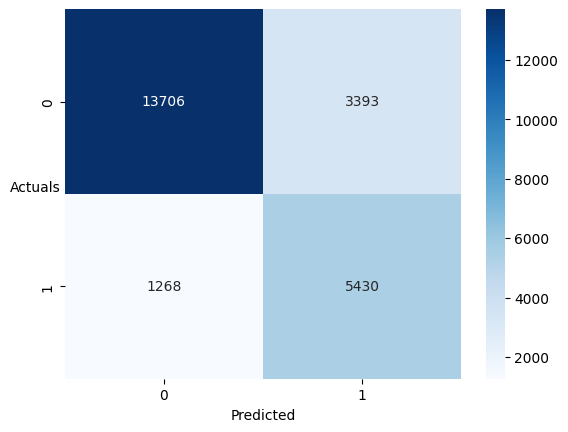

In [211]:
sns.heatmap((confusion_matrix(logreg_tuned_test, y_test)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

## Decision Tree

In [212]:
param_DT = {
    'algo__min_samples_split': [2,1,3,4,6,8,10,],
    'algo__max_depth': [None,1,2,4,8,10,12,14,18, 20],
    'algo__min_samples_leaf':[1,2,4,5,8]
}

model_DT = GridSearchCV(estimator=pipe_DT, param_grid=param_DT, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_DT.fit(X_train, y_train)

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['market_segment',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['lead_time',
                                                                          'is_repeated_guest',
                                                                          'total_of_special_requests',
                                                                          'stays',
                                                                          'guests',
                                                                          'is_previously_cancelled',
                                                                          'is_booking_changes',
                                                                          'parking_space',
                                                                          'hotel_label',
                                                                          'booking_country_label'])])),
                                       ('algo', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 1, 2, 4, 8, 10, 12, 14, 18,
                                             20],
                         'algo__min_samples_leaf': [1, 2, 4, 5, 8],
                         'algo__min_samples_split': [2, 1, 3, 4, 6, 8, 10]},
             scoring='accuracy', verbose=1)

In [213]:
DT_tuned = model_DT.best_estimator_
DT_tuned_train = model_DT.best_score_
DT_tuned_test = DT_tuned.predict(X_test)

In [ ]:
DT_model_tuned_train = DT_tuned_train
DT_model_tuned_test = accuracy_score(y_test, DT_tuned_test)

print("Training Accuracy: ",DT_model_tuned_train)
print(f"Testing Accuracy: ",DT_model_tuned_test)

Training Accuracy:  0.8362713677829535
Testing Accuracy:  0.8385090557633316


In [ ]:
print('The classification report for Decision Tree testing data set is\n',classification_report(y_test, DT_tuned_test))

The classification report for Decision Tree testing data set is
               precision    recall  f1-score   support

           0       0.86      0.89      0.87     14974
           1       0.81      0.74      0.77      8823

    accuracy                           0.84     23797
   macro avg       0.83      0.82      0.82     23797
weighted avg       0.84      0.84      0.84     23797



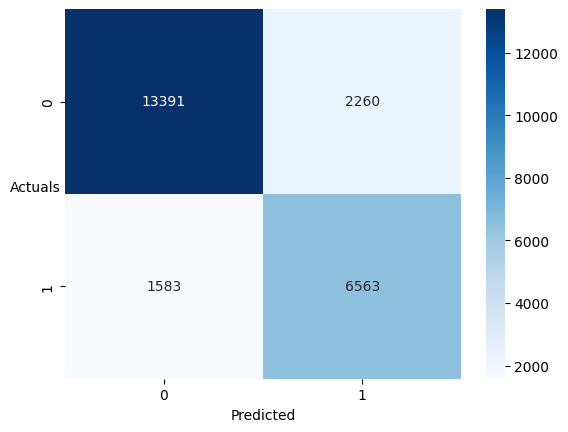

In [ ]:
sns.heatmap((confusion_matrix(DT_tuned_test, y_test)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

## Random Forest

In [ ]:
param_RF = {
    'algo__min_samples_split': [2,3,4,6,8,10],
    'algo__max_depth': [None,12,14,18, 20],
    'algo__min_samples_leaf':[1,2,4,8],
    'algo__max_leaf_nodes':[None, 1,2,4]
}

model_RF = GridSearchCV(estimator=pipe_RF, param_grid=param_RF, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_RF.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['market_segment',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['lead_time',
                                                                          'is_repeated_guest',
                                                                          'total_of_special_requests',
                                                                          'stays',
                                                                          'guests',
                                                                          'is_previously_cancelled',
                                                                          'is_booking_changes',
                                                                          'parking_space',
                                                                          'hotel_label',
                                                                          'booking_country_label'])])),
                                       ('algo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 12, 14, 18, 20],
                         'algo__max_leaf_nodes': [None, 1, 2, 4],
                         'algo__min_samples_leaf': [1, 2, 4, 8],
                         'algo__min_samples_split': [2, 3, 4, 6, 8, 10]},
             scoring='accuracy', verbose=1)

In [154]:
RF_tuned = model_RF.best_estimator_
RF_tuned_train = model_RF.best_score_
RF_tuned_test = RF_tuned.predict(X_test)

In [155]:
RF_model_tuned_train = RF_tuned_train
RF_model_tuned_test = accuracy_score(y_test, RF_tuned_test)

print("Training Accuracy: ",RF_model_tuned_train)
print(f"Testing Accuracy: ",RF_model_tuned_test)

Training Accuracy:  0.8529331466634402
Testing Accuracy:  0.8539311677942598


In [156]:
print('The classification report for Random Forest testing data set is\n',classification_report(y_test, RF_tuned_test))

The classification report for Random Forest testing data set is
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     14974
           1       0.83      0.76      0.79      8823

    accuracy                           0.85     23797
   macro avg       0.85      0.83      0.84     23797
weighted avg       0.85      0.85      0.85     23797



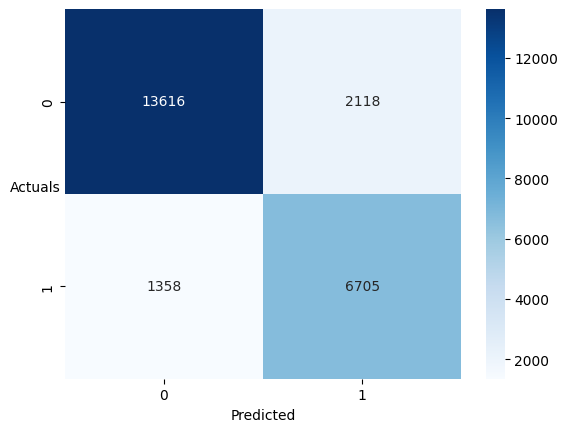

In [157]:
sns.heatmap((confusion_matrix(RF_tuned_test, y_test)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

## XGBoost

In [158]:
param_XGB = {
    'algo__learning_rate': [0.300000012, 0.5, 0.7, 0.8],
    'algo__max_depth': [6, 8, 10, 12],
    'algo__gamma':[0,1,2,3]
}

model_XGB = GridSearchCV(estimator=pipe_XGB, param_grid=param_XGB, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_XGB.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['market_segment',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['lead_time',
                                                                          'is_repeated_guest',
                                                                          'total_of_special_requests',
                                                                          'stays',
                                                                          'guests',
                                                                          'is_previously_canc...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'algo__gamma': [0, 1, 2, 3],
                         'algo__learning_rate': [0.300000012, 0.5, 0.7, 0.8],
                         'algo__max_depth': [6, 8, 10, 12]},
             scoring='accuracy', verbose=1)

In [159]:
XGB_tuned = model_XGB.best_estimator_
XGB_tuned_train = model_XGB.best_score_
XGB_tuned_test = XGB_tuned.predict(X_test)

In [160]:
XGB_model_tuned_train = XGB_tuned_train
XGB_model_tuned_test = accuracy_score(y_test, XGB_tuned_test)

print("Training Accuracy: ",XGB_model_tuned_train)
print(f"Testing Accuracy: ",XGB_model_tuned_test)

Training Accuracy:  0.850748011069994
Testing Accuracy:  0.8505693995041391


In [161]:
print('The classification report for XG Boost testing data set is\n',classification_report(y_test, XGB_tuned_test))

The classification report for XG Boost testing data set is
               precision    recall  f1-score   support

           0       0.86      0.91      0.88     14974
           1       0.83      0.75      0.79      8823

    accuracy                           0.85     23797
   macro avg       0.85      0.83      0.84     23797
weighted avg       0.85      0.85      0.85     23797



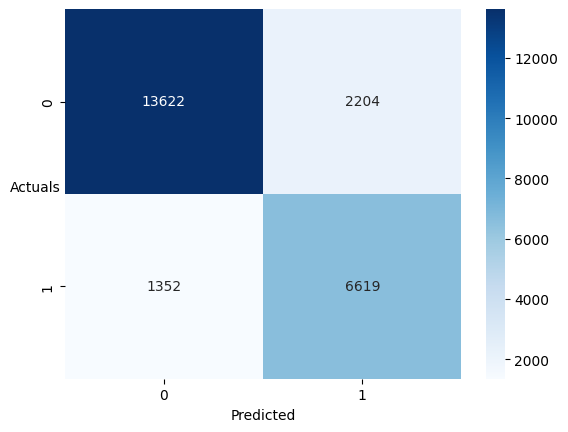

In [162]:
sns.heatmap((confusion_matrix(XGB_tuned_test, y_test)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [215]:
evaluation_matrix_tuned_training = {"Training" : [logreg_model_tuned_train, DT_model_tuned_train, RF_model_tuned_train, XGB_model_tuned_train],
                                   "Testing" : [logreg_model_tuned_test, DT_model_tuned_test, RF_model_tuned_test, XGB_model_tuned_test]}

eva_tuned_training = pd.DataFrame(data = evaluation_matrix_tuned_training, index = ['Logistic Regression' ,'Decision Tree', 'Random Forest', 'XGB'])

eva_tuned_training

display_side_by_side([eva_tuned_training], ['Accuracy Train & Test'])

,Training,Testing
Logistic Regression,0.802549,0.804135
Decision Tree,0.836271,0.838509
Random Forest,0.852933,0.853931
XGB,0.850748,0.850569


## Comparing Each Evaluation Matrix

In [216]:
display_side_by_side([eva_base_training, eva_tuned_training], ['Base Model', 'Tuned Model'])

,Training,Testing
Logistic Regression,0.802580,0.804177
Decision Tree,0.941978,0.832962
Random Forest,0.941967,0.840862
XGB,0.859888,0.849057
,Training,Testing
Logistic Regression,0.802549,0.804135
Decision Tree,0.836271,0.838509
Random Forest,0.852933,0.853931
XGB,0.850748,0.850569


# Business Questions:

## - What machine learning algorithm that has the highest accuracy when it comes predicting hotel booking cancellations ?


###  Tuned "Random Forest" and "XGB" Models has The best accuracy among all algorithm's that we have tried

From the above evaluation matrix table to predict hotel cancellation classification case, we see that tuned Random Forest has the accuracy of '85.2%' and  tuned XGB has the accuracy of '85.3' when it comes to predicting hotel cancellation based on certain features.

### Overfitting

1. For the base model we see that there are 2 algorithms that has an overfitting condition (Decission Tree & Random Forst).
2. After Hyperparameter Tuning on all the algorithm we don't see any overfitting condition, and after the tuning Random Forest and XGB has the highest accuracy score.

### How This Model Will become helpfull for hotels... ?

1. This model will allow hotel managers to take actions on bookings that's identified as to be canceled and further these models will contribute to the hotel revenue management.
2. These prediction models enable hotel managers to reduce revenue loss derived from booking cancellations and to reduce the risks associated with overbooking.This models also allow hotel managers to implement less rules and cancelled fee on cancellation policies without increasing any uncertainty. This has the potential to make a more sales, since less rules and cancelled fee policies generate more bookings.